### Plot the GBF $s=0$

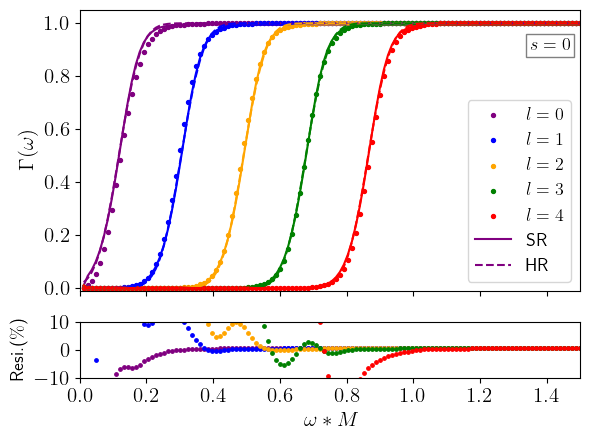

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import erf, erfc
import matplotlib.lines as mlines
from matplotlib import rc
from matplotlib.ticker import LogFormatter

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

# Dataset
GBF_00_00 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=0.txt")
GBF_00_10 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=1.txt")
GBF_00_20 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=2.txt")
GBF_00_30 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=3.txt")
GBF_00_40 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=4.txt")
s00x, s00l0, s00l1, s00l2, s00l3, s00l4 = GBF_00_00[:, 0], GBF_00_00[:, 1], GBF_00_10[:, 1], GBF_00_20[:, 1], GBF_00_30[:, 1], GBF_00_40[:, 1]
np.savetxt("multispin/GBF_s=00.txt", np.c_[s00x, s00l0, s00l1, s00l2, s00l3, s00l4])
s00_array = np.column_stack((s00l0, s00l1, s00l2, s00l3, s00l4)) 

def GBF0tp(omega, l):
    a = -1.586
    b = -2.530
    c = 13.533
    result = 0.5 * (erf(a + b*l + c*omega) + 1)
    return result
    # hr = 0.5 * (erf(a + b*l + c*omega) + 1)   
    # nn = s00_array[:, l]   
    # const = np.heaviside(0.25 - np.abs(nn-hr)/nn, 0)
    # return  const * hr + (1-const) * nn   

def GBF0sr(omega, l):
    a = 1.688
    b = 1.880
    c = -10.057
    result = erf( erfc(a + b*l + c*omega) )
    result[0] = 0.01
    return result
    # hr = erf( erfc(a + b*l + c*omega) )   
    # nn = s00_array[:, l]   
    # const = np.heaviside(0.25 - np.abs(nn-hr)/nn, 0)
    # return  const * hr + (1-const) * nn   

fig, axs = plt.subplots(2, 1, figsize=(6, 4.5), sharex=True, gridspec_kw={'height_ratios': [5,1]})

axs[0].scatter(s00x, s00l0, color= 'purple', s=8, label=r'$l=0$')
axs[0].scatter(s00x, s00l1, color= 'blue', s=8, label=r'$l=1$')
axs[0].scatter(s00x, s00l2, color= 'orange', s=8, label=r'$l=2$')
axs[0].scatter(s00x, s00l3, color= 'green', s=8, label=r'$l=3$')
axs[0].scatter(s00x, s00l4, color= 'red', s=8, label=r'$l=4$')

axs[0].plot(s00x, GBF0sr(s00x, 0), color='purple', linestyle ='-',label='SR')
axs[0].plot(s00x, GBF0sr(s00x, 1), color='blue', linestyle ='-')
axs[0].plot(s00x, GBF0sr(s00x, 2), color='orange', linestyle ='-')
axs[0].plot(s00x, GBF0sr(s00x, 3), color='green', linestyle ='-')
axs[0].plot(s00x, GBF0sr(s00x, 4), color='red', linestyle ='-')

axs[0].plot(s00x, GBF0tp(s00x, 0), color='purple', linestyle ='--',label='HR')
axs[0].plot(s00x, GBF0tp(s00x, 1), color='blue', linestyle ='--')
axs[0].plot(s00x, GBF0tp(s00x, 2), color='orange', linestyle ='--')
axs[0].plot(s00x, GBF0tp(s00x, 3), color='green', linestyle ='--')
axs[0].plot(s00x, GBF0tp(s00x, 4), color='red', linestyle ='--')

# axs[1].scatter(s00x, (s00l0-GBF0tp(s00x, 0))/s00l0, color= 'purple', s=6, marker='o')
# axs[1].scatter(s00x, (s00l1-GBF0tp(s00x, 1))/s00l1, color= 'blue', s=6, marker='o')
# axs[1].scatter(s00x, (s00l2-GBF0tp(s00x, 2))/s00l2, color= 'orange', s=6, marker='o')
# axs[1].scatter(s00x, (s00l3-GBF0tp(s00x, 3))/s00l3, color= 'green', s=6, marker='o')
# axs[1].scatter(s00x, (s00l4-GBF0tp(s00x, 4))/s00l4, color= 'red', s=6, marker='o')

axs[1].scatter(s00x, 100*(s00l0-GBF0sr(s00x, 0))/s00l0, color= 'purple', s=6, marker='o')
axs[1].scatter(s00x, 100*(s00l1-GBF0sr(s00x, 1))/s00l1, color= 'blue', s=6, marker='o')
axs[1].scatter(s00x, 100*(s00l2-GBF0sr(s00x, 2))/s00l2, color= 'orange', s=6, marker='o')
axs[1].scatter(s00x, 100*(s00l3-GBF0sr(s00x, 3))/s00l3, color= 'green', s=6, marker='o')
axs[1].scatter(s00x, 100*(s00l4-GBF0sr(s00x, 4))/s00l4, color= 'red', s=6, marker='o')
axs[1].set_ylim(-10, 10)
axs[1].set_ylabel("Resi.($\%$)", fontsize=13)

axs[1].tick_params('x', labelsize=15)
axs[0].tick_params('y', labelsize=15)
axs[1].tick_params('y', labelsize=15)

axs[1].set_xlabel("$\omega*M$", fontsize=15)
axs[0].set_ylabel("$\Gamma (\omega)$", fontsize=15)
axs[0].set_xlim(0, 1.5)
axs[0].set_ylim(-0.01, 1.05)
axs[0].legend(fontsize=13, loc='lower right')
axs[0].text(1.35, 0.9, r'$s=0$', fontsize=13, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='square,pad=0.2'))


plt.tight_layout()
plt.savefig("s=0.pdf", bbox_inches='tight')
plt.show()

### Plot the GBF $s=0.5$

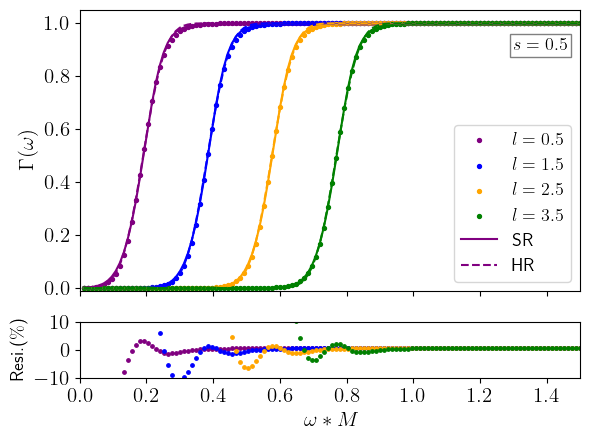

In [2]:
GBF_05_05 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0.5_l=0.5.txt")
GBF_05_15 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0.5_l=1.5.txt")
GBF_05_25 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0.5_l=2.5.txt")
GBF_05_35 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0.5_l=3.5.txt")
s05x, s05l0, s05l1, s05l2, s05l3 = GBF_05_05[:, 0], GBF_05_05[:, 1], GBF_05_15[:, 1], GBF_05_25[:, 1], GBF_05_35[:, 1]
np.savetxt("multispin/GBF_s=05.txt", np.c_[s05x, s05l0, s05l1, s05l2, s05l3])
s05_array = np.column_stack((s05l0, s05l1, s05l2, s05l3)) 

def GBF05tp(omega, l):
    a = -1.279
    b = -2.636
    c = 13.651
    return 0.5 * (erf(a + b*l + c*omega) + 1)

def GBF05sr(omega, l):
    a = 1.461
    b = 1.960
    c = -10.149
    return erf( erfc(a + b*l + c*omega) )


fig, axs = plt.subplots(2, 1, figsize=(6, 4.5), sharex=True, gridspec_kw={'height_ratios': [5,1]})

axs[0].scatter(s05x, s05l0, color= 'purple', s=8, label=r'$l=0.5$')
axs[0].scatter(s05x, s05l1, color= 'blue', s=8, label=r'$l=1.5$')
axs[0].scatter(s05x, s05l2, color= 'orange', s=8, label=r'$l=2.5$')
axs[0].scatter(s05x, s05l3, color= 'green', s=8, label=r'$l=3.5$')

axs[0].plot(s05x, GBF05sr(s05x, 0.5), color='purple', linestyle ='-',label='SR')
axs[0].plot(s05x, GBF05sr(s05x, 1.5), color='blue', linestyle ='-')
axs[0].plot(s05x, GBF05sr(s05x, 2.5), color='orange', linestyle ='-')
axs[0].plot(s05x, GBF05sr(s05x, 3.5), color='green', linestyle ='-')

axs[0].plot(s05x, GBF05tp(s05x, 0.5), color='purple', linestyle ='--',label='HR')
axs[0].plot(s05x, GBF05tp(s05x, 1.5), color='blue', linestyle ='--')
axs[0].plot(s05x, GBF05tp(s05x, 2.5), color='orange', linestyle ='--')
axs[0].plot(s05x, GBF05tp(s05x, 3.5), color='green', linestyle ='--')

# axs[1].scatter(s05x, (s05l0-GBF05tp(s05x, 0.5))/s05l0, color= 'purple', s=6, marker='o')
# axs[1].scatter(s05x, (s05l1-GBF05tp(s05x, 1.5))/s05l1, color= 'blue', s=6, marker='o')
# axs[1].scatter(s05x, (s05l2-GBF05tp(s05x, 2.5))/s05l2, color= 'orange', s=6, marker='o')
# axs[1].scatter(s05x, (s05l3-GBF05tp(s05x, 3.5))/s05l3, color= 'green', s=6, marker='o')

axs[1].scatter(s05x, 100*(s05l0-GBF05sr(s05x, 0.5))/s05l0, color= 'purple', s=6, marker='o')
axs[1].scatter(s05x, 100*(s05l1-GBF05sr(s05x, 1.5))/s05l1, color= 'blue', s=6, marker='o')
axs[1].scatter(s05x, 100*(s05l2-GBF05sr(s05x, 2.5))/s05l2, color= 'orange', s=6, marker='o')
axs[1].scatter(s05x, 100*(s05l3-GBF05sr(s05x, 3.5))/s05l3, color= 'green', s=6, marker='o')
axs[1].set_ylim(-10, 10)
axs[1].set_ylabel("Resi.($\%$)", fontsize=13)

axs[1].tick_params('x', labelsize=15)
axs[0].tick_params('y', labelsize=15)
axs[1].tick_params('y', labelsize=15)

axs[1].set_xlabel("$\omega*M$", fontsize=15)
axs[0].set_ylabel("$\Gamma (\omega)$", fontsize=15)
axs[0].set_xlim(0, 1.5)
axs[0].set_ylim(-0.01, 1.05)
axs[0].legend(fontsize=13, loc='lower right')
axs[0].text(1.3, 0.9, r'$s=0.5$', fontsize=13, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='square,pad=0.2'))

plt.tight_layout()
plt.savefig("s=05.pdf", bbox_inches='tight')
plt.show()

### Plot the GBF $s=1$

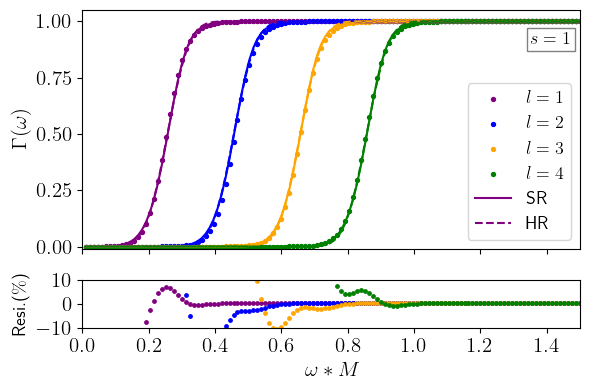

In [3]:
GBF_10_10 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=1.txt")
GBF_10_20 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=2.txt")
GBF_10_30 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=3.txt")
GBF_10_40 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=4.txt")
s10x, s10l0, s10l1, s10l2, s10l3 = GBF_10_10[:, 0], GBF_10_10[:, 1], GBF_10_20[:, 1], GBF_10_30[:, 1], GBF_10_40[:, 1]
np.savetxt("multispin/GBF_s=10.txt", np.c_[s10x, s10l0, s10l1, s10l2, s10l3]) 
s10_array = np.column_stack((s10l0, s10l1, s10l2, s10l3)) 

def GBF10tp(omega, l):
    a = -0.790
    b = -2.770
    c = 13.847
    return 0.5 * (erf(a + b*l + c*omega) + 1)
    # hr = 0.5 * (erf(a + b*l + c*omega) + 1)   # model values
    # nn = s10_array[:, l-1]   # numerical values
    # const = np.heaviside(0.25 - np.abs(nn-hr)/nn, 0)
    # return  const * hr + (1-const) * nn   

def GBF10sr(omega, l):
    a = 1.097
    b = 2.059
    c = -10.293
    return erf( erfc(a + b*l + c*omega) )
    # sr = erf( erfc(a + b*l + c*omega) )   # model values
    # nn = s10_array[:, l-1]   # numerical values
    # const = np.heaviside(0.25 - np.abs(nn-sr)/nn , 0)
    # return const * sr + (1-const) * nn

fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True, gridspec_kw={'height_ratios': [5,1]})

axs[0].scatter(s10x, s10l0, color= 'purple', s=8, label=r'$l=1$')
axs[0].scatter(s10x, s10l1, color= 'blue', s=8, label=r'$l=2$')
axs[0].scatter(s10x, s10l2, color= 'orange', s=8, label=r'$l=3$')
axs[0].scatter(s10x, s10l3, color= 'green', s=8, label=r'$l=4$')

axs[0].plot(s10x, GBF10sr(s10x, 1), color='purple', linestyle ='-',label='SR')
axs[0].plot(s10x, GBF10sr(s10x, 2), color='blue', linestyle ='-')
axs[0].plot(s10x, GBF10sr(s10x, 3), color='orange', linestyle ='-')
axs[0].plot(s10x, GBF10sr(s10x, 4), color='green', linestyle ='-')

axs[0].plot(s10x, GBF10tp(s10x, 1), color='purple', linestyle ='--',label='HR')
axs[0].plot(s10x, GBF10tp(s10x, 2), color='blue', linestyle ='--')
axs[0].plot(s10x, GBF10tp(s10x, 3), color='orange', linestyle ='--')
axs[0].plot(s10x, GBF10tp(s10x, 4), color='green', linestyle ='--')

axs[1].scatter(s10x, 100*(s10l0-GBF10sr(s10x, 1))/s10l0, color= 'purple', s=6, marker='o')
axs[1].scatter(s10x, 100*(s10l1-GBF10sr(s10x, 2))/s10l1, color= 'blue', s=6, marker='o')
axs[1].scatter(s10x, 100*(s10l2-GBF10sr(s10x, 3))/s10l2, color= 'orange', s=6, marker='o')
axs[1].scatter(s10x, 100*(s10l3-GBF10sr(s10x, 4))/s10l3, color= 'green', s=6, marker='o')

# axs[1].scatter(s10x, (s10l0-GBF10tp(s10x, 1))/s10l0, color= 'purple', s=6, marker='^')
# axs[1].scatter(s10x, (s10l1-GBF10tp(s10x, 2))/s10l1, color= 'blue', s=6, marker='^')
# axs[1].scatter(s10x, (s10l2-GBF10tp(s10x, 3))/s10l2, color= 'orange', s=6, marker='^')
# axs[1].scatter(s10x, (s10l3-GBF10tp(s10x, 4))/s10l3, color= 'green', s=6, marker='^')
axs[1].set_ylim(-10, 10)
axs[1].set_ylabel("Resi.($\%$)", fontsize=13)

axs[1].tick_params('x', labelsize=15)
axs[0].tick_params('y', labelsize=15)
axs[1].tick_params('y', labelsize=15)

axs[1].set_xlabel("$\omega*M$", fontsize=15)
axs[0].set_ylabel("$\Gamma (\omega)$", fontsize=15)
axs[0].set_xlim(0, 1.5)
axs[0].set_ylim(-0.01, 1.05)
legend1 = axs[0].legend(fontsize=13, loc='lower right')
axs[0].text(1.35, 0.9, r'$s=1$', fontsize=13, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='square,pad=0.2'))

plt.tight_layout()
plt.savefig("s=1.pdf", bbox_inches='tight')
plt.show()

### Plot the GBF $s=1.5$

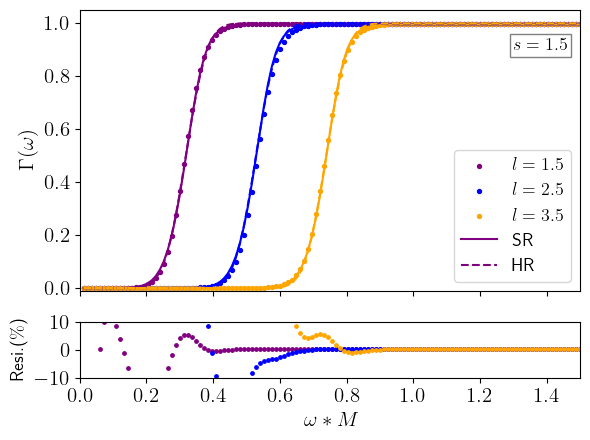

In [4]:
GBF_15_15 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1.5_l=1.5.txt")
GBF_15_25 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1.5_l=2.5.txt")
GBF_15_35 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1.5_l=3.5.txt")
s15x, s15l0, s15l1, s15l2 = GBF_15_15[:, 0], GBF_15_15[:, 1], GBF_15_25[:, 1], GBF_15_35[:, 1]
np.savetxt("multispin/GBF_s=15.txt", np.c_[s15x, s15l0, s15l1, s15l2]) 
s15_array = np.column_stack((s15l0, s15l1, s15l2)) 

def GBF15tp(omega, l):
    a = -0.034
    b = -2.960
    c = 14.064
    return 0.5 * (erf(a + b*l + c*omega) + 1)

def GBF15sr(omega, l):
    a = 0.535
    b = 2.200
    c = -10.454
    return erf( erfc(a + b*l + c*omega) )

fig, axs = plt.subplots(2, 1, figsize=(6, 4.5), sharex=True, gridspec_kw={'height_ratios': [5,1]})

axs[0].scatter(s15x, s15l0, color= 'purple', s=8, label=r'$l=1.5$')
axs[0].scatter(s15x, s15l1, color= 'blue', s=8, label=r'$l=2.5$')
axs[0].scatter(s15x, s15l2, color= 'orange', s=8, label=r'$l=3.5$')

axs[0].plot(s15x, GBF15sr(s15x, 1.5), color='purple', linestyle ='-',label='SR')
axs[0].plot(s15x, GBF15sr(s15x, 2.5), color='blue', linestyle ='-')
axs[0].plot(s15x, GBF15sr(s15x, 3.5), color='orange', linestyle ='-')

axs[0].plot(s15x, GBF15tp(s15x, 1.5), color='purple', linestyle ='--',label='HR')
axs[0].plot(s15x, GBF15tp(s15x, 2.5), color='blue', linestyle ='--')
axs[0].plot(s15x, GBF15tp(s15x, 3.5), color='orange', linestyle ='--')

# axs[1].scatter(s15x, (s15l0-GBF15tp(s15x, 1.5))/s15l0, color= 'purple', s=6, marker='o')
# axs[1].scatter(s15x, (s15l1-GBF15tp(s15x, 2.5))/s15l1, color= 'blue', s=6, marker='o')
# axs[1].scatter(s15x, (s15l2-GBF15tp(s15x, 3.5))/s15l2, color= 'orange', s=6, marker='o')

axs[1].scatter(s15x, 100*(s15l0-GBF15sr(s15x, 1.5))/s15l0, color= 'purple', s=6, marker='o')
axs[1].scatter(s15x, 100*(s15l1-GBF15sr(s15x, 2.5))/s15l1, color= 'blue', s=6, marker='o')
axs[1].scatter(s15x, 100*(s15l2-GBF15sr(s15x, 3.5))/s15l2, color= 'orange', s=6, marker='o')
axs[1].set_ylim(-10, 10)
axs[1].set_ylabel("Resi.($\%$)", fontsize=13)

axs[1].tick_params('x', labelsize=15)
axs[0].tick_params('y', labelsize=15)
axs[1].tick_params('y', labelsize=15)

axs[1].set_xlabel("$\omega*M$", fontsize=15)
axs[0].set_ylabel("$\Gamma (\omega)$", fontsize=15)
axs[0].set_xlim(0, 1.5)
axs[0].set_ylim(-0.01, 1.05)
axs[0].legend(fontsize=13, loc='lower right')
axs[0].text(1.3, 0.9, r'$s=1.5$', fontsize=13, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='square,pad=0.2'))

plt.tight_layout()
plt.savefig("s=15.pdf", bbox_inches='tight')
plt.show()

### Plot the GBF $s=2$

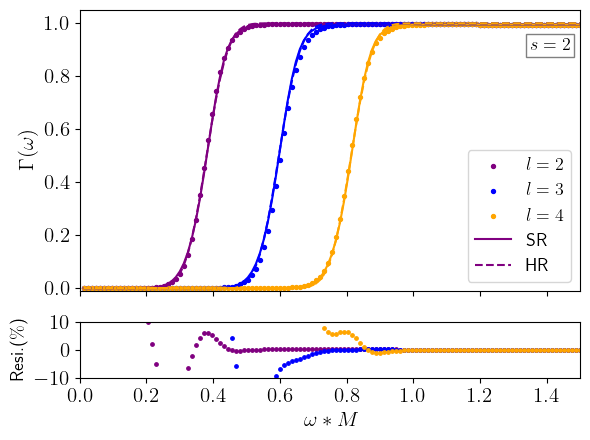

In [5]:
GBF_20_20 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=2_l=2.txt") 
GBF_20_30 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=2_l=3.txt")
GBF_20_40 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=2_l=4.txt")
s20x, s20l0, s20l1, s20l2 = GBF_20_20[:, 0], GBF_20_20[:, 1], GBF_20_30[:, 1], GBF_20_40[:, 1]
np.savetxt("multispin/GBF_s=20.txt", np.c_[s20x, s20l0, s20l1, s20l2])
s20_array = np.column_stack((s20l0, s20l1, s20l2))

def GBF20tp(omega, l):
    a = 0.752
    b = -3.065
    c = 14.140
    return 0.5 * (erf(a + b*l + c*omega) + 1)

def GBF20sr(omega, l):
    a = -0.049
    b = 2.278
    c = -10.510
    return erf( erfc(a + b*l + c*omega) )

fig, axs = plt.subplots(2, 1, figsize=(6, 4.5), sharex=True, gridspec_kw={'height_ratios': [5,1]})

axs[0].scatter(s20x, s20l0, color= 'purple', s=8, label=r'$l=2$')
axs[0].scatter(s20x, s20l1, color= 'blue', s=8, label=r'$l=3$')
axs[0].scatter(s20x, s20l2, color= 'orange', s=8, label=r'$l=4$')

axs[0].plot(s20x, GBF20sr(s20x, 2), color='purple', linestyle ='-',label='SR')
axs[0].plot(s20x, GBF20sr(s20x, 3), color='blue', linestyle ='-')
axs[0].plot(s20x, GBF20sr(s20x, 4), color='orange', linestyle ='-')

axs[0].plot(s20x, GBF20tp(s20x, 2), color='purple', linestyle ='--',label='HR')
axs[0].plot(s20x, GBF20tp(s20x, 3), color='blue', linestyle ='--')
axs[0].plot(s20x, GBF20tp(s20x, 4), color='orange', linestyle ='--')

# axs[1].scatter(s20x, (s20l0-GBF20tp(s20x, 2))/s20l0, color= 'purple', s=6, marker='o')
# axs[1].scatter(s20x, (s20l1-GBF20tp(s20x, 3))/s20l1, color= 'blue', s=6, marker='o')
# axs[1].scatter(s20x, (s20l2-GBF20tp(s20x, 4))/s20l2, color= 'orange', s=6, marker='o')

axs[1].scatter(s20x, 100*(s20l0-GBF20sr(s20x, 2))/s20l0, color= 'purple', s=6, marker='o')
axs[1].scatter(s20x, 100*(s20l1-GBF20sr(s20x, 3))/s20l1, color= 'blue', s=6, marker='o')
axs[1].scatter(s20x, 100*(s20l2-GBF20sr(s20x, 4))/s20l2, color= 'orange', s=6, marker='o')
axs[1].set_ylim(-10, 10)
axs[1].set_ylabel("Resi.($\%$)", fontsize=13)

axs[1].tick_params('x', labelsize=15)
axs[0].tick_params('y', labelsize=15)
axs[1].tick_params('y', labelsize=15)

axs[1].set_xlabel("$\omega*M$", fontsize=15)
axs[0].set_ylabel("$\Gamma (\omega)$", fontsize=15)
axs[0].set_xlim(0, 1.5)
axs[0].set_ylim(-0.01, 1.05)
axs[0].legend(fontsize=13,loc='lower right')
axs[0].text(1.35, 0.9, r'$s=2$', fontsize=13, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='square,pad=0.2'))

plt.tight_layout()
plt.savefig("s=2.pdf", bbox_inches='tight')
plt.show()